# TFG - Sistema de Control de Horarios Multiplataforma

Proyecto: **SARTU-Linux**

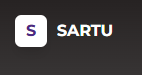

Autor: Beatriz Gonzalez

Fecha: 27/11/25

## 1. Introducción
El proyecto SARTU-Linux consiste en el desarrollo de un sistema de control de horarios multiplataforma para empresas, cuyo objetivo principal es permitir el registro fiable del tiempo de trabajo de los empleados mediante distintos métodos de fichaje. La aplicación está diseñada para funcionar tanto en navegadores web como en dispositivos móviles mediante tecnología PWA (Progressive Web App), permitiendo su uso en entornos reales de trabajo.

Nivel de Infraestructura con Docker (Dónde se ejecutan los procesos)

Todos los procesos anteriores no se ejecutan en un único sistema, sino que están distribuidos en distintos servicios de infraestructura, representados mediante contenedores Docker.

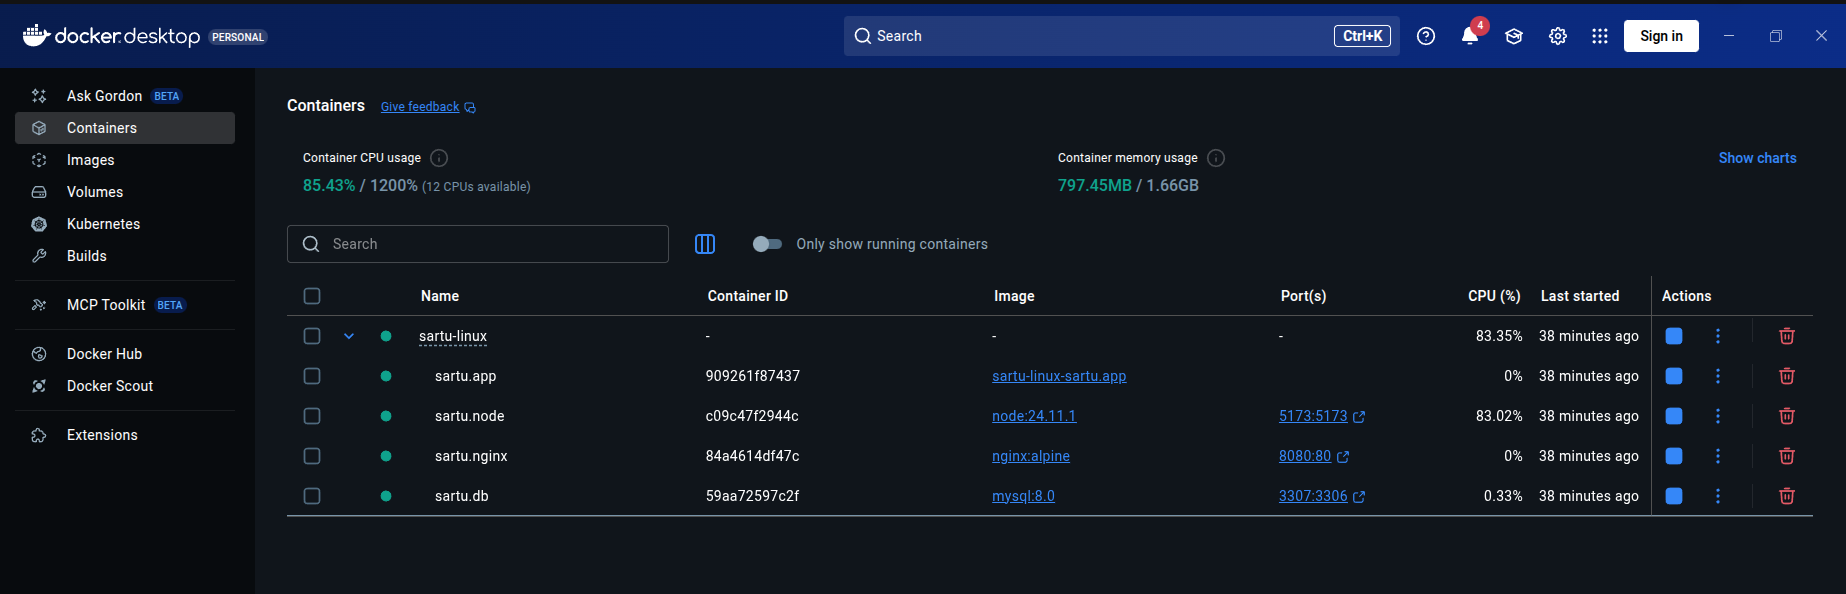

Nodos de infraestructura:

- Contenedor de aplicación (Laravel / PHP-FPM)

- Contenedor de servidor web (Nginx)

- Contenedor de frontend (Node.js)

- Contenedor de base de datos (MySQL)

> **Relación Directa: Proceso ↔ Contenedor**
>
> - **Procesos de autenticación, fichaje, cálculo de tiempos y control de roles**  
>   → Se ejecutan en el contenedor **Laravel (PHP-FPM)**  
>
> - **Procesos de acceso desde navegador y PWA**  
>   → Pasan por el contenedor **Nginx**  
>
> - **Procesos de interfaz y recursos visuales**  
>   → Se generan en el contenedor **Node.js**  
>
> - **Procesos de almacenamiento de usuarios, fichajes, empresas y resúmenes**  
>   → Se ejecutan en el contenedor **MySQL**


Esto demuestra que cada requisito funcional del sistema está soportado por un proceso concreto y por un servicio de infraestructura específico.

## 2. Objetivos
- Control horario automático
- Arquitectura extensible por Strategy
- Soporte Web y PWA

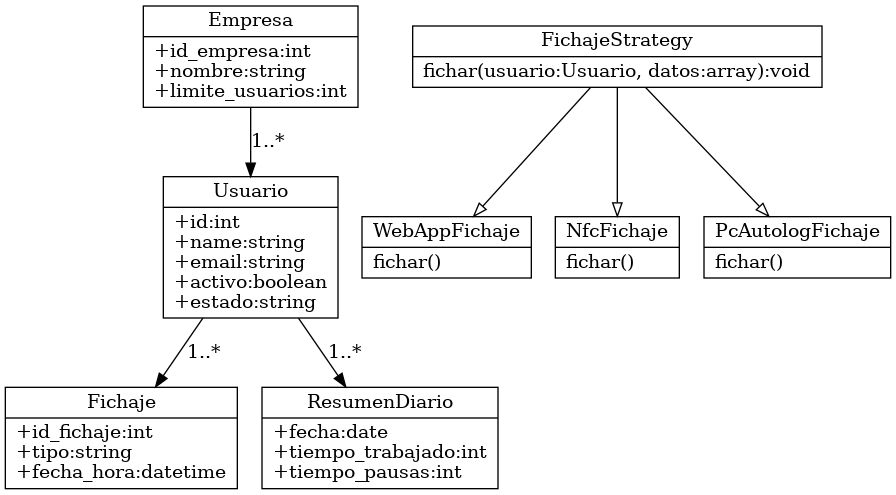

## 3. Login

El proceso de autenticación de SARTU-Linux se basa en Laravel Breeze, utilizando el controlador AuthenticatedSessionController. El usuario introduce sus credenciales en la vista auth.login, que envía la solicitud al controlador. Tras la validación de los datos, el sistema intenta autenticar al usuario mediante Auth::attempt, consultando la base de datos y verificando la contraseña cifrada.

Una vez autenticado, el sistema evalúa tanto el rol como el estado del usuario. Si el usuario pertenece al rol admin_sistema, el acceso es directo al panel principal. Si el usuario se encuentra en estado bloqueado, se cierra la sesión inmediatamente y se deniega el acceso. Si el estado es pendiente, se fuerza obligatoriamente el cambio de contraseña mediante CambioPassController antes de permitir el acceso. Finalmente, los usuarios en estado activo acceden directamente al panel de control.

Este mecanismo garantiza un control de acceso estricto, alineado con las políticas de seguridad del sistema.

> nota:  Se debe indicar con el fin de aumentar la seguirdad del proceso de login, se restringe es registro del usuario al administrador  del sistema  unico capaz de "dar de alta al  usuario".


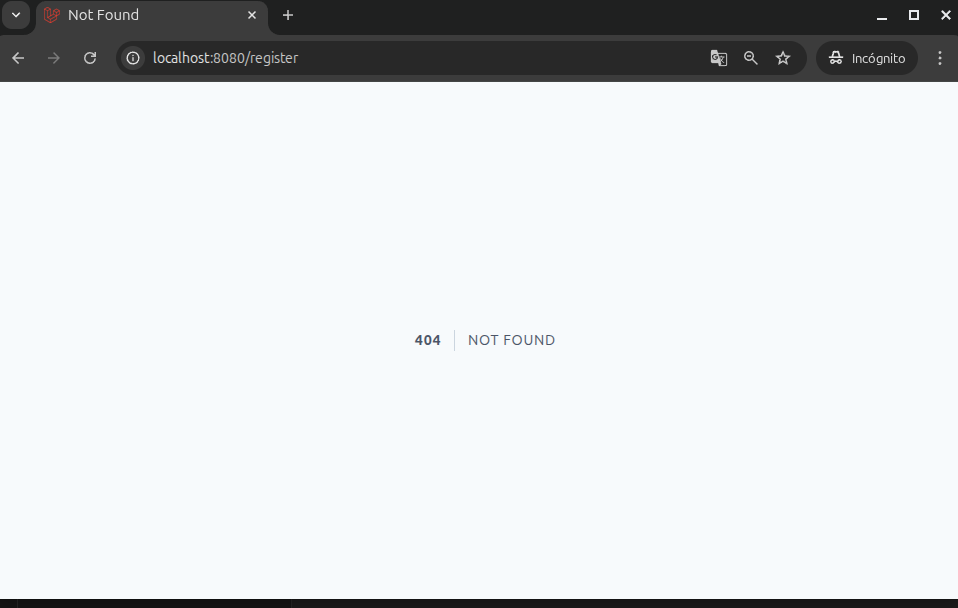



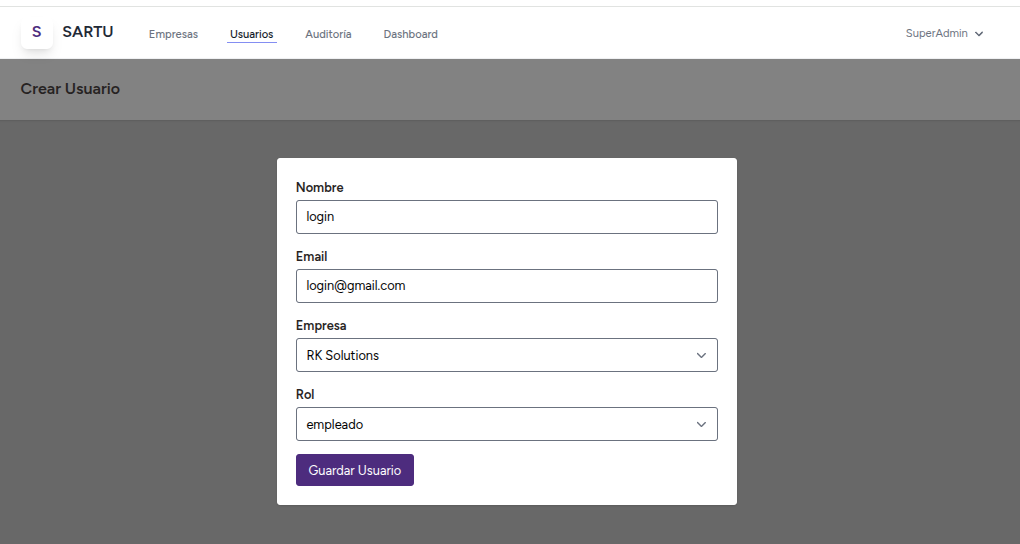

Como se observa tras dar de alta al usuario se le propocionará una cuenta temporal, aleatoria generada por el propio sistema; que el usuario debera utilizar para el login por primera vez.

Una vez usada le obligara a cambiar por la contraseña que desee siguiendo los parametros de seguridad minimo 8 caracteres que habrán de contener al menos  mayusculas, minusculas, números y caracter especiales  que sera la definitiva.

en este caso la contraseña  es  ***8LPNMw52TS***     con el fin de hacer test  como contraseña finita  usamos ***Sartu123.***

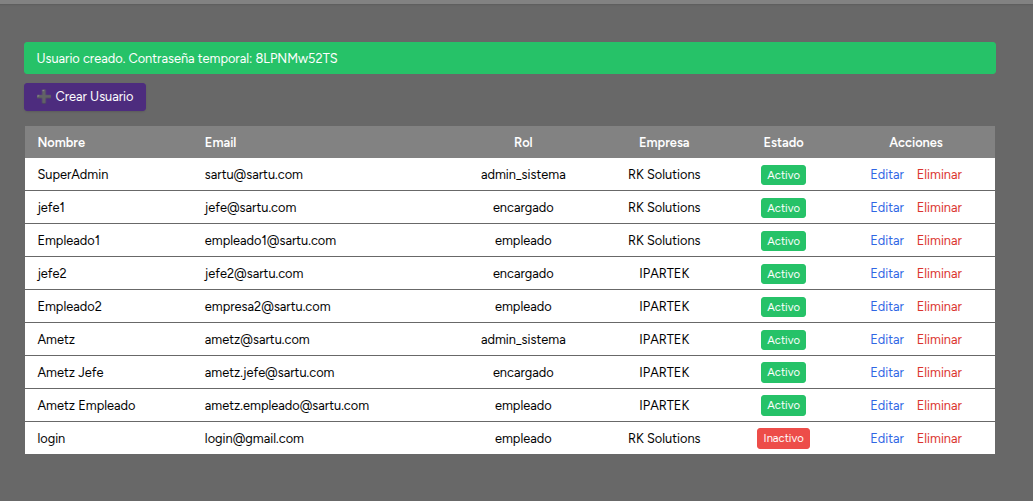

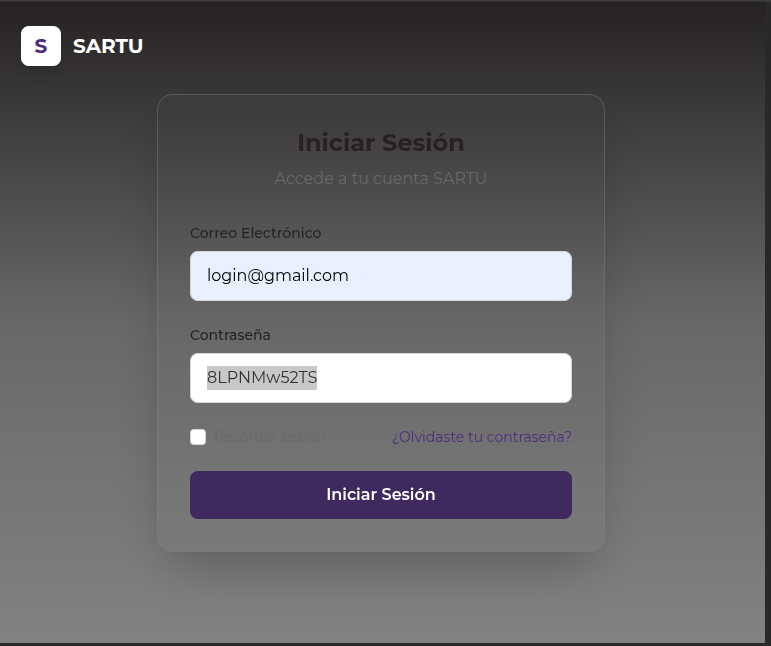

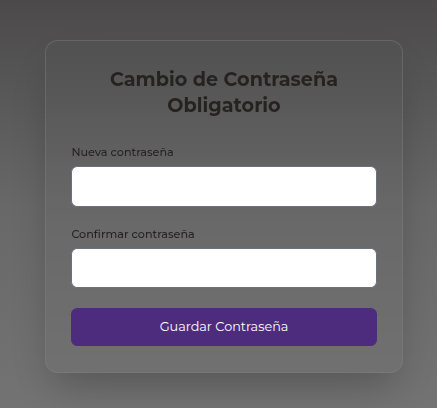

## 4. Gestión de Usuarios y Roles

El sistema implementa tres tipos de usuarios:

Administrador del Sistema
Puede crear empresas, asignarles un límite de usuarios, gestionar usuarios globales y consultar el estado de todas las empresas.

Encargado de Empresa
Puede registrar empleados dentro de su empresa hasta el límite asignado, consultar el estado de sus trabajadores y visualizar resúmenes de jornada.

Empleado
Puede registrar sus fichajes, consultar su progreso diario y visualizar su historial de fichajes.

Estos roles están implementados mediante control de permisos a nivel de middleware, garantizando que cada usuario solo tenga acceso a las funcionalidades autorizadas.

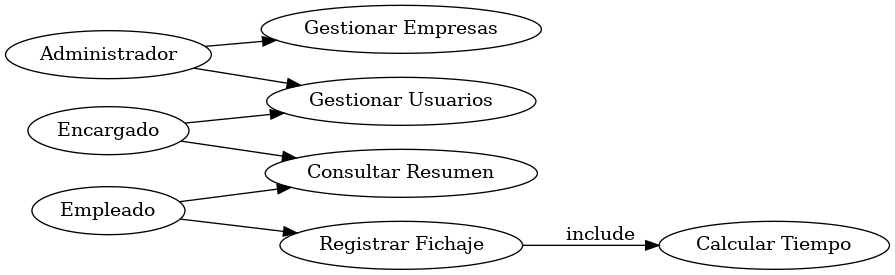

## 5. Sistema de Fichajes

### El sistema permite:

Registro de entrada y salida.

Registro de pausas y reanudaciones.

Uso de múltiples métodos de fichaje:

Aplicación web

PWA móvil

NFC

PC (autolog)

Consulta del historial de fichajes por empleado, con restricciones de acceso según rol.

Visualización del progreso de la jornada laboral, mostrando tiempo trabajado, pausas y estado actual.

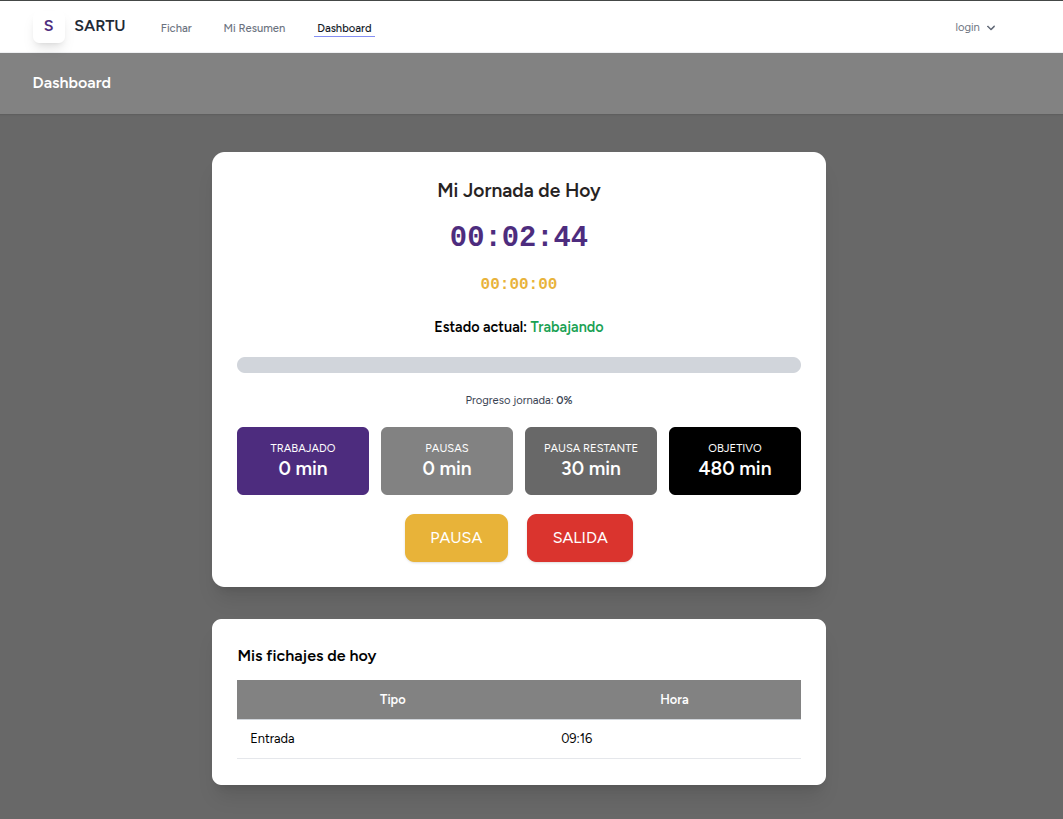

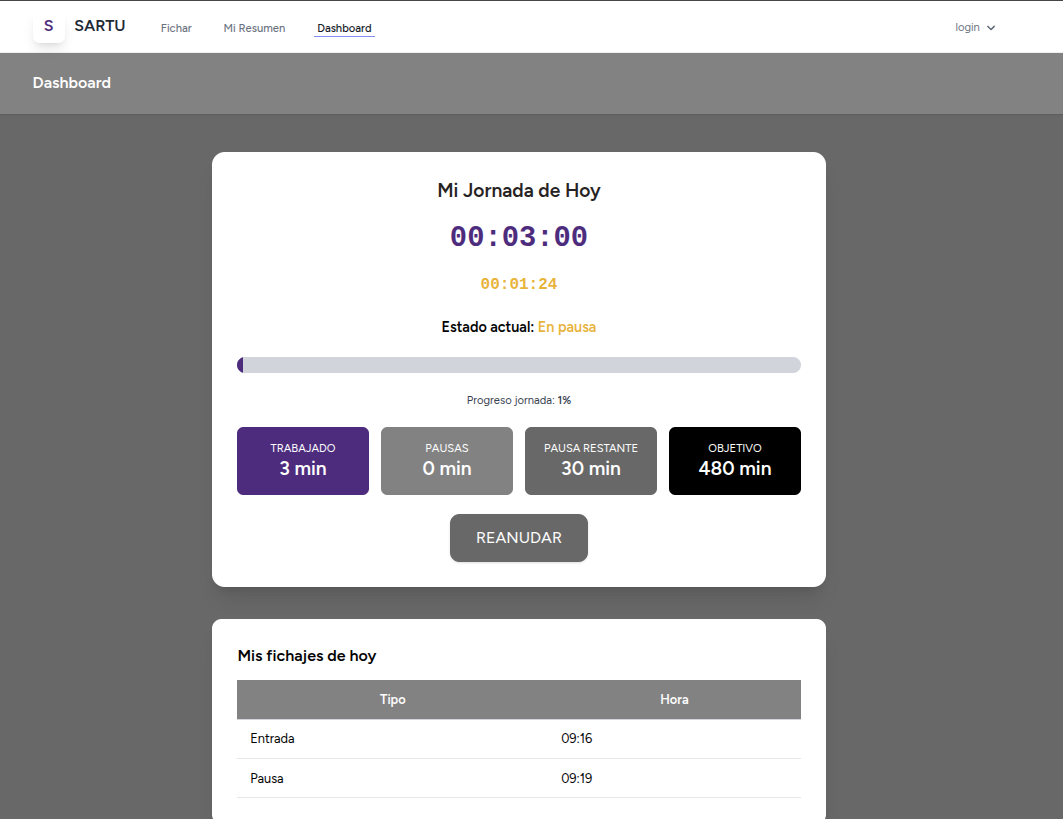

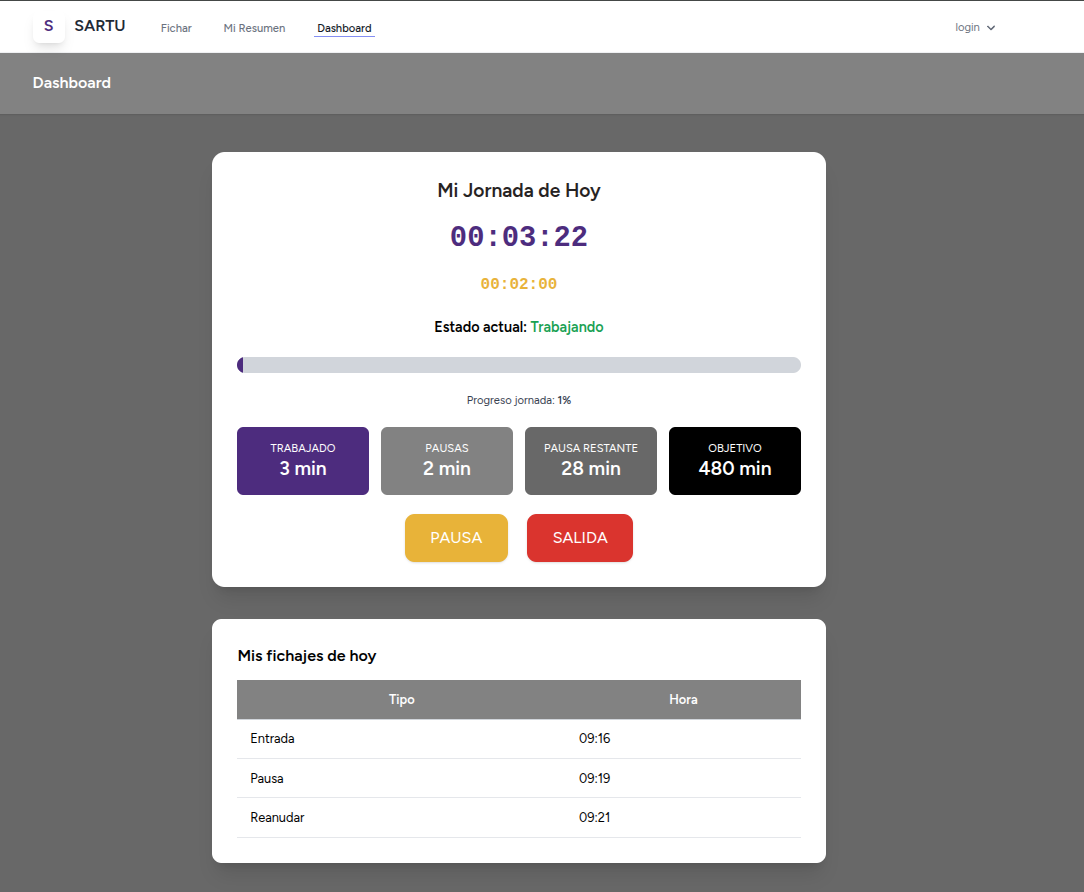

## 6. Arquitectura Extensible de Fichajes

El sistema de fichajes se ha implementado utilizando el patrón de diseño Strategy, junto con un patrón Factory para la selección dinámica del método de fichaje.
Esto permite que nuevos métodos puedan añadirse creando nuevas clases que implementen la interfaz correspondiente, sin necesidad de modificar el código existente.

Arquitectura en el sistema:

- FichajeStrategyInterface

- WebAppFichaje

- PwaMovilFichaje

- NfcFichaje

- PcAutologFichaje

- FichajeFactory

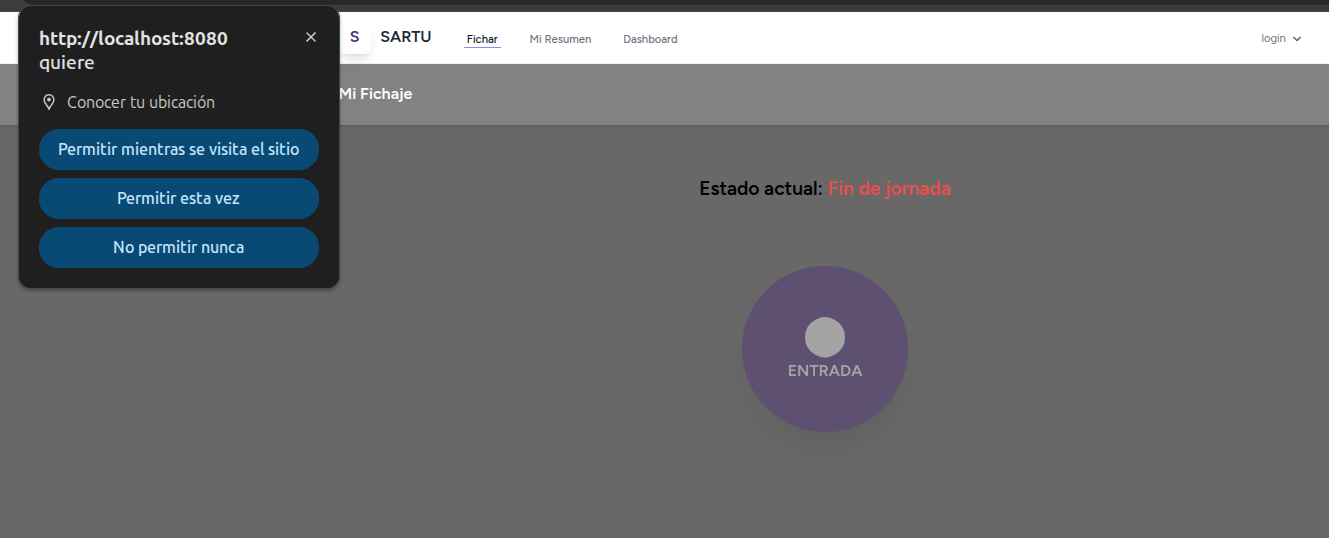

> Sera obligatorio la conexion GPS  que sera guardad y almacenada.

## 7. Gestión del Tiempo

El sistema calcula automáticamente:

- Tiempo trabajado total.

- Tiempo de pausas.

- Tiempo total de jornada.

Estos cálculos se realizan mediante el servicio ResumenService, que procesa los fichajes diarios y genera automáticamente los resúmenes correspondientes.

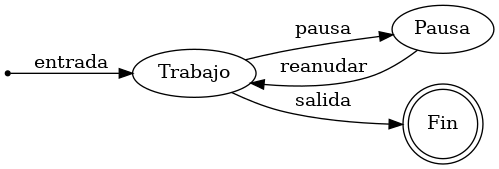

## 8. Auditoria
Se ha incluido un sistema de registro legal de  los movimientos de la aplicacion con filtro fecha empresa o usuario descargable en pdf  que permita facilitar cualquier acto necesario o legal.

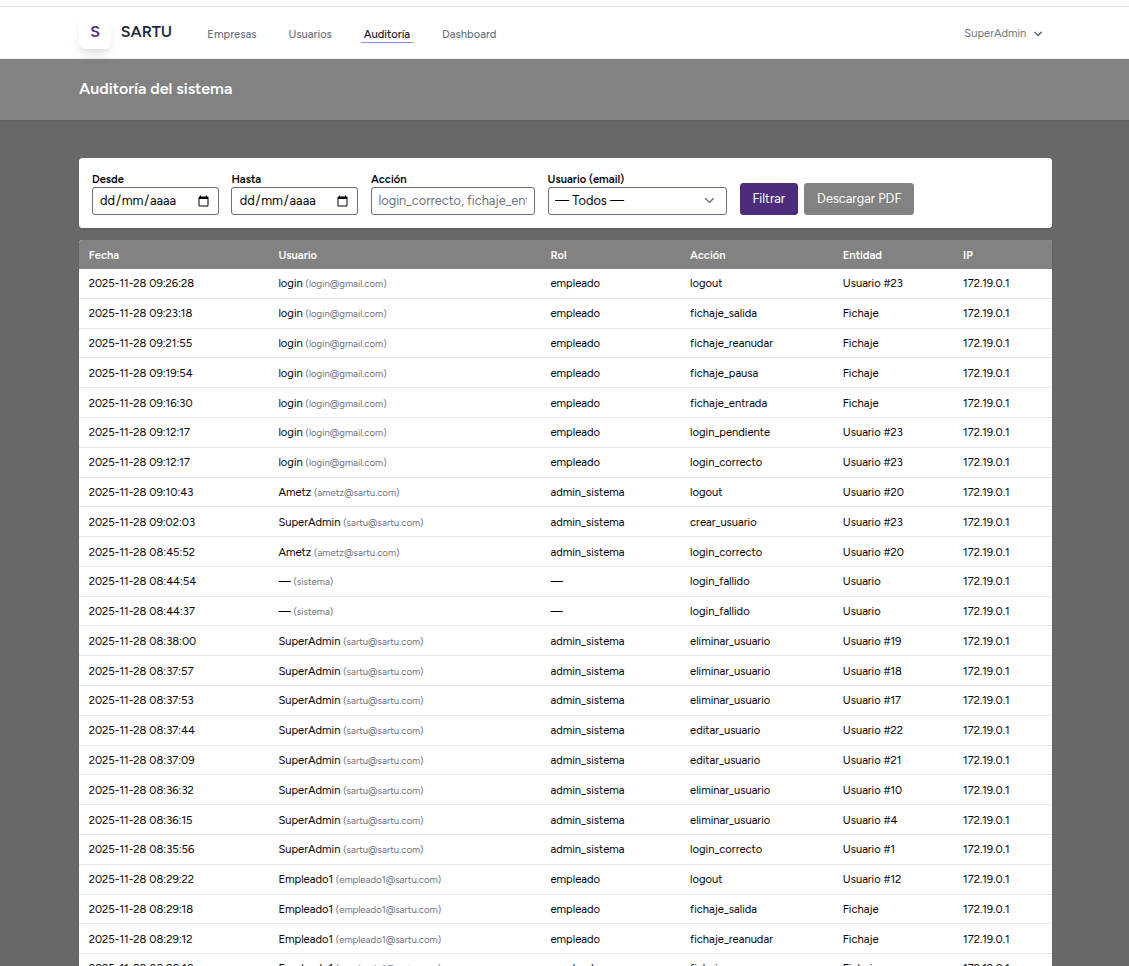

## 9. Arquitectura del Sistema

El sistema sigue el patrón MVC (Modelo-Vista-Controlador) proporcionado por Laravel:

Modelos:
Usuario, Empresa, Fichaje, MetodoFichaje, ResumenDiario, Rol, Auditoria.

Controladores:
FichajeController, UsuarioController, EmpresaController, DashboardController, ResumenDiarioController, entre otros.

Vistas:
Implementadas con Blade y Tailwind CSS.

Además, se incorporan servicios de dominio como ResumenService para la lógica de cálculo de tiempos, y middleware de seguridad para el control de roles.

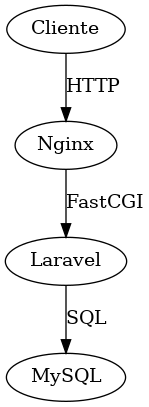

BBDD Relacional: MySql

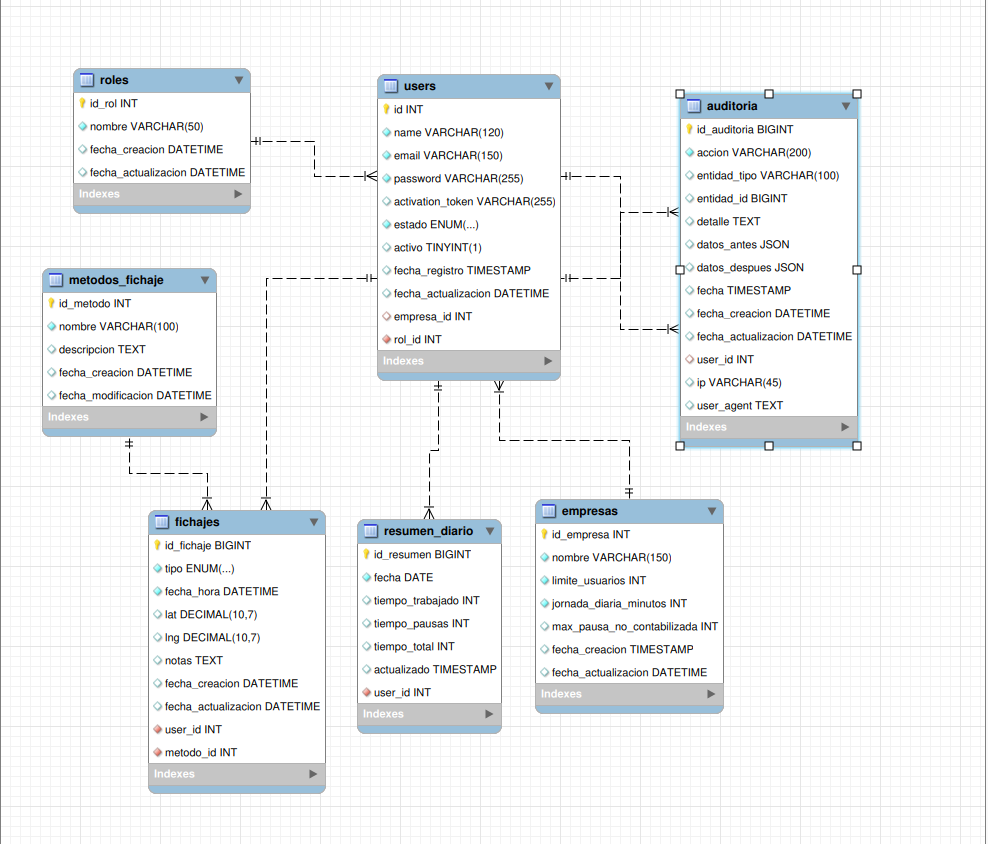

## 9. Glosario Técnico

MVC: Modelo-Vista-Controlador.

PWA: Progressive Web App.

ORM: Object Relational Mapping.

Strategy: Patrón de diseño para comportamientos intercambiables.

Factory: Patrón de creación de objetos.

Middleware: Capa intermedia de control de peticiones.

Docker: Plataforma de contenedores.

FastCGI: Protocolo de comunicación entre Nginx y PHP-FPM.